# 가설 설정

가설 : 신용이 충분한 사람들에 대해서 대출승인이 일어날 것이다.

- loan_grade : 대출 등급
- cb_person_cred_hist_length : 개인이 신용 기록을 보유한 기간
- cb_person_default_on_file : 신용 기록에 대한 연체나 채무 불이행 여부

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random, os
import numpy as np

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
loan = df_train.copy()

# EDA

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
loan.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
loan.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [7]:
loan.drop(columns='id',inplace=True)

## 수치형, 범주형 데이터 분석 및 상관 관계 분석

In [8]:
loan = loan[df_train['person_emp_length'] <= 100]

In [9]:
loan_num = loan.select_dtypes(include=['number'])
loan_cat = loan.select_dtypes(include=['object'])

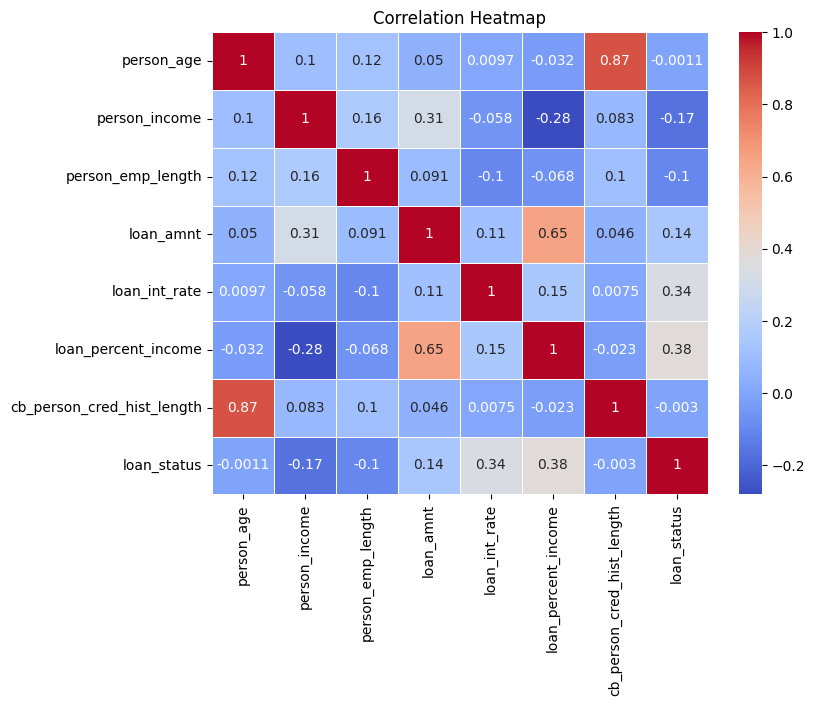

In [10]:
corr = loan_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

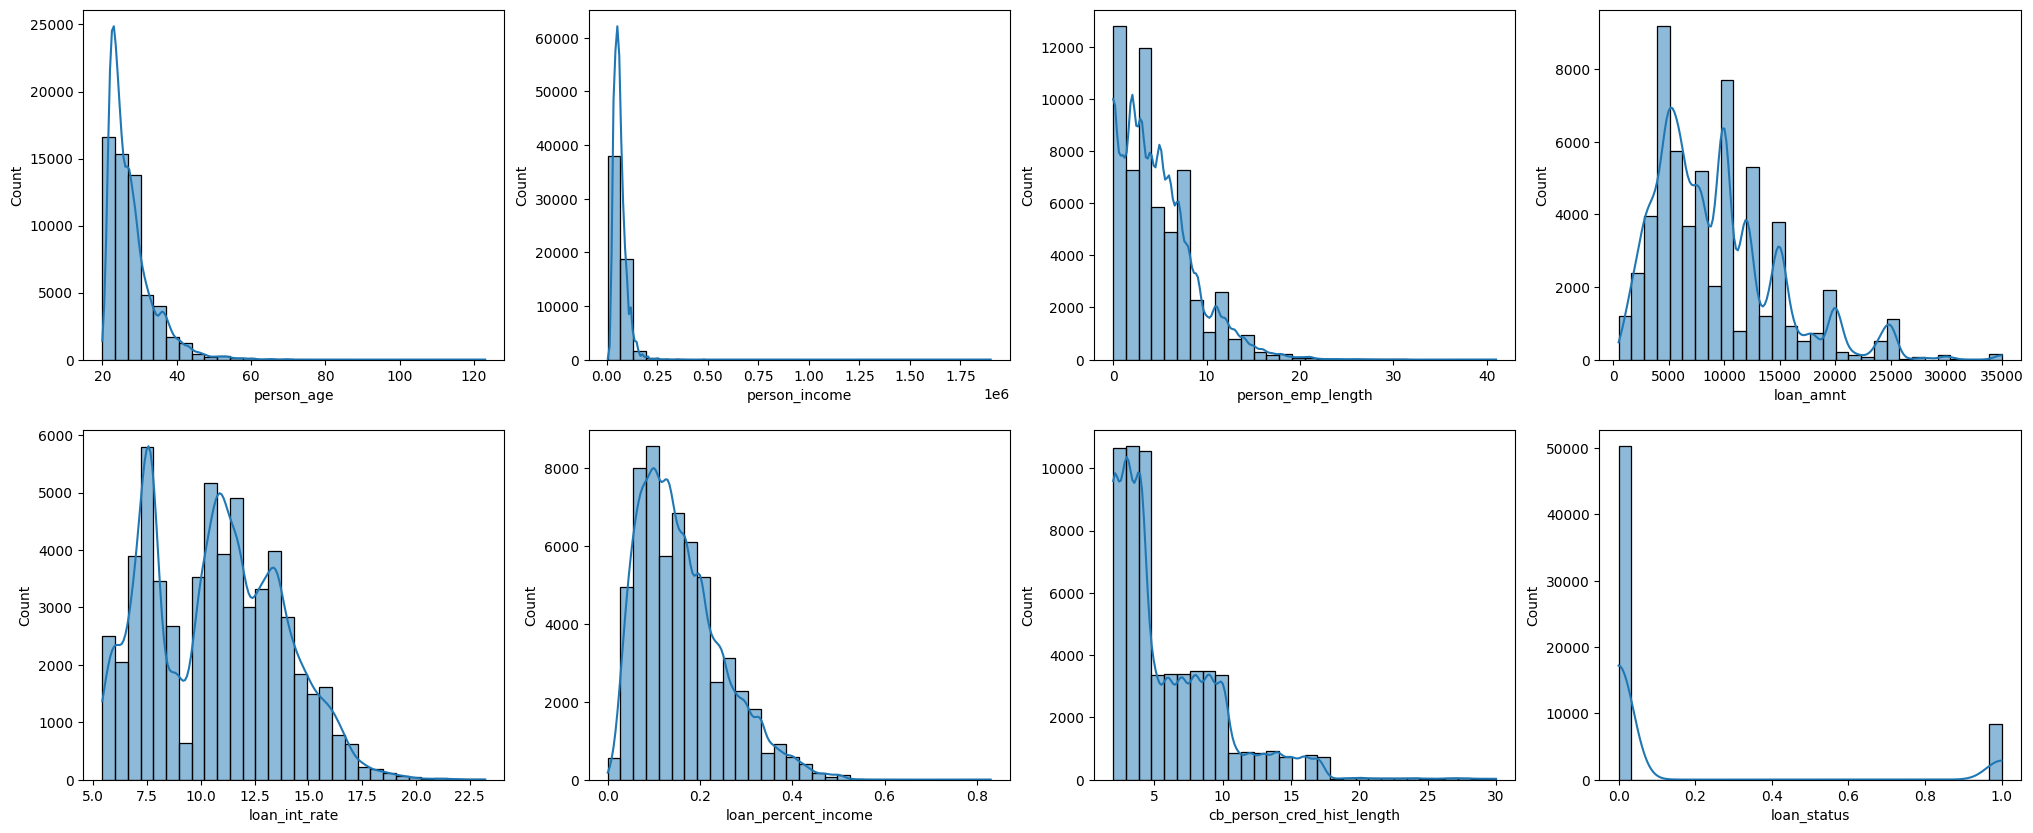

In [11]:
cols = loan_num.columns
fig, ax = plt.subplots(2,4, figsize=(25, 10))
for i, v in enumerate(cols):
    row = i //4
    col = i % 4
    sns.histplot(x=v, data = loan_num, bins= 30,kde=True, ax=ax[row,col])
plt.show()

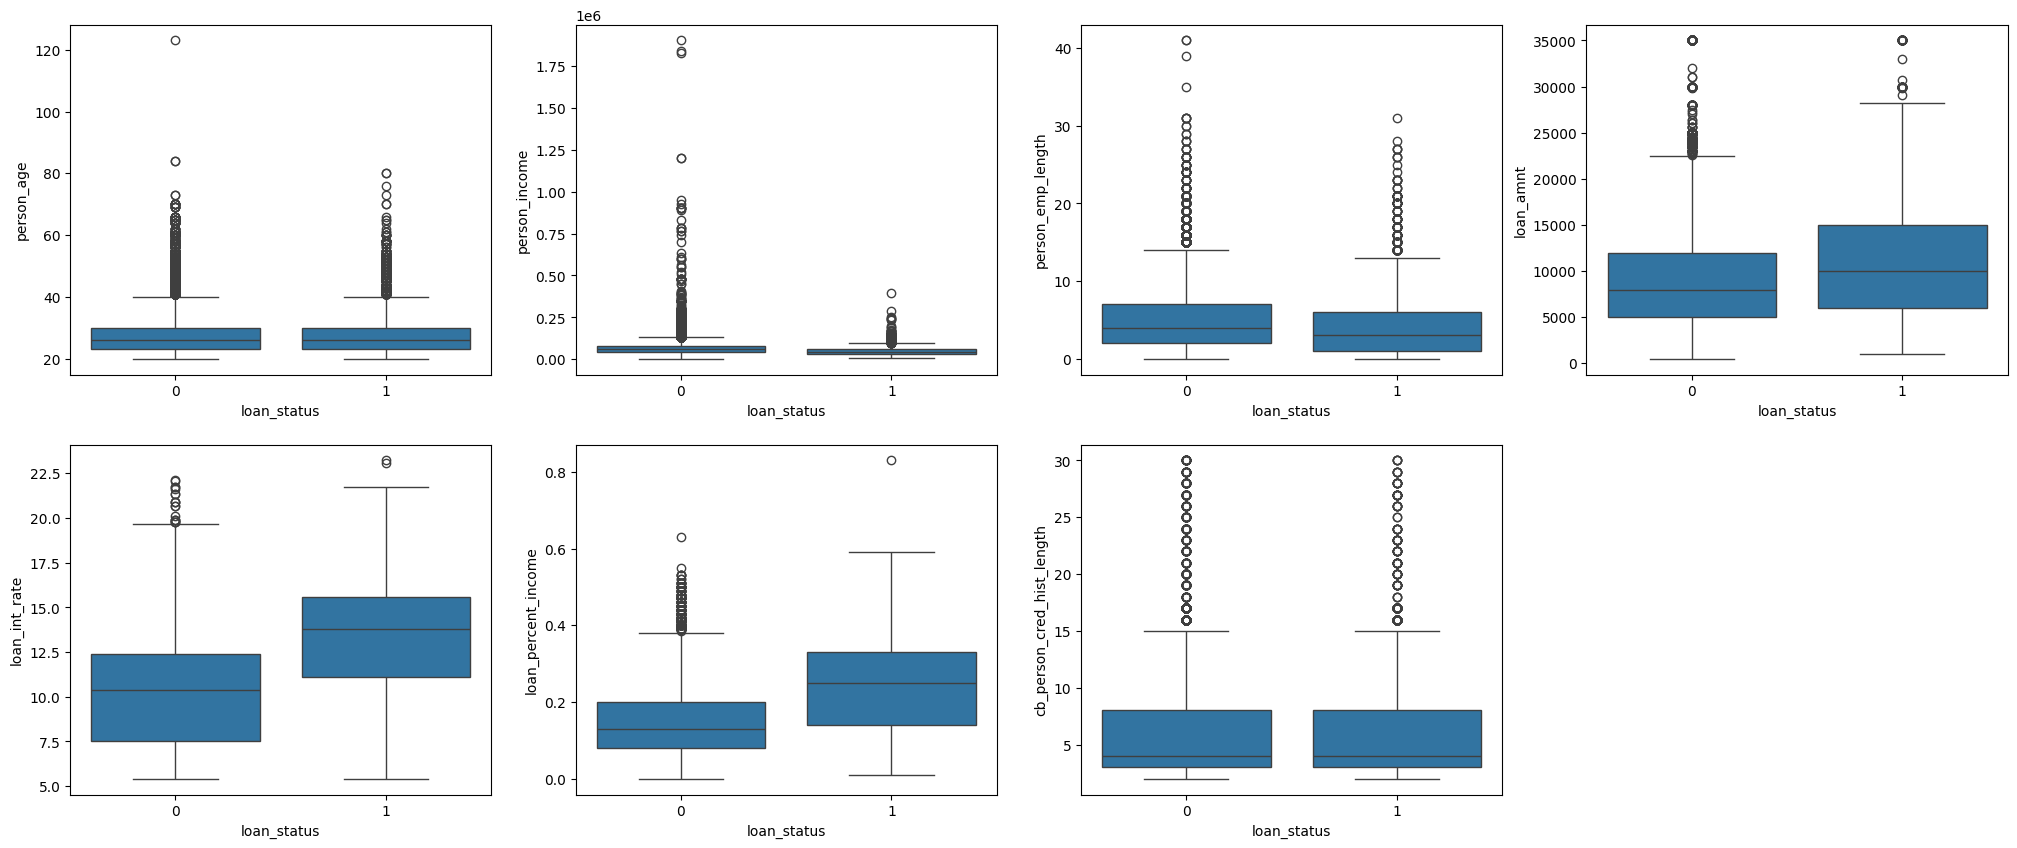

In [12]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10))
for i, v in enumerate(cols):
    row = i // 4  
    col = i % 4 
    sns.boxplot(x='loan_status', y=v, data=loan_num, ax=ax[row, col])
fig.delaxes(ax[1, 3])
plt.show()

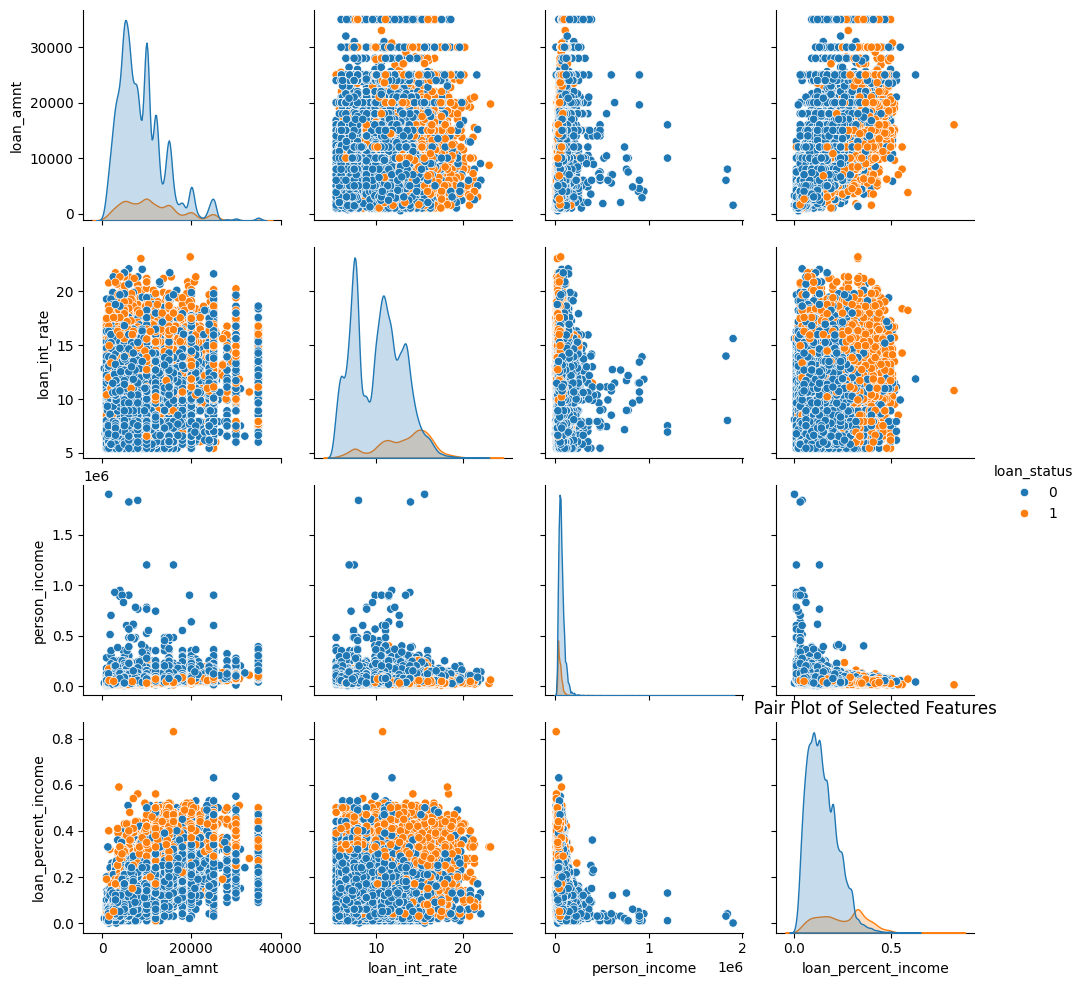

In [13]:
subset_features = ['loan_amnt', 'loan_int_rate', 'person_income', 'loan_percent_income', 'loan_status']
# subset_features = ['person_age', 'cb_person_cred_hist_length', 'loan_amnt', 'loan_percent_income','person_income', 'loan_status']
sns.pairplot(loan[subset_features], hue='loan_status')
plt.title('Pair Plot of Selected Features')
plt.show()

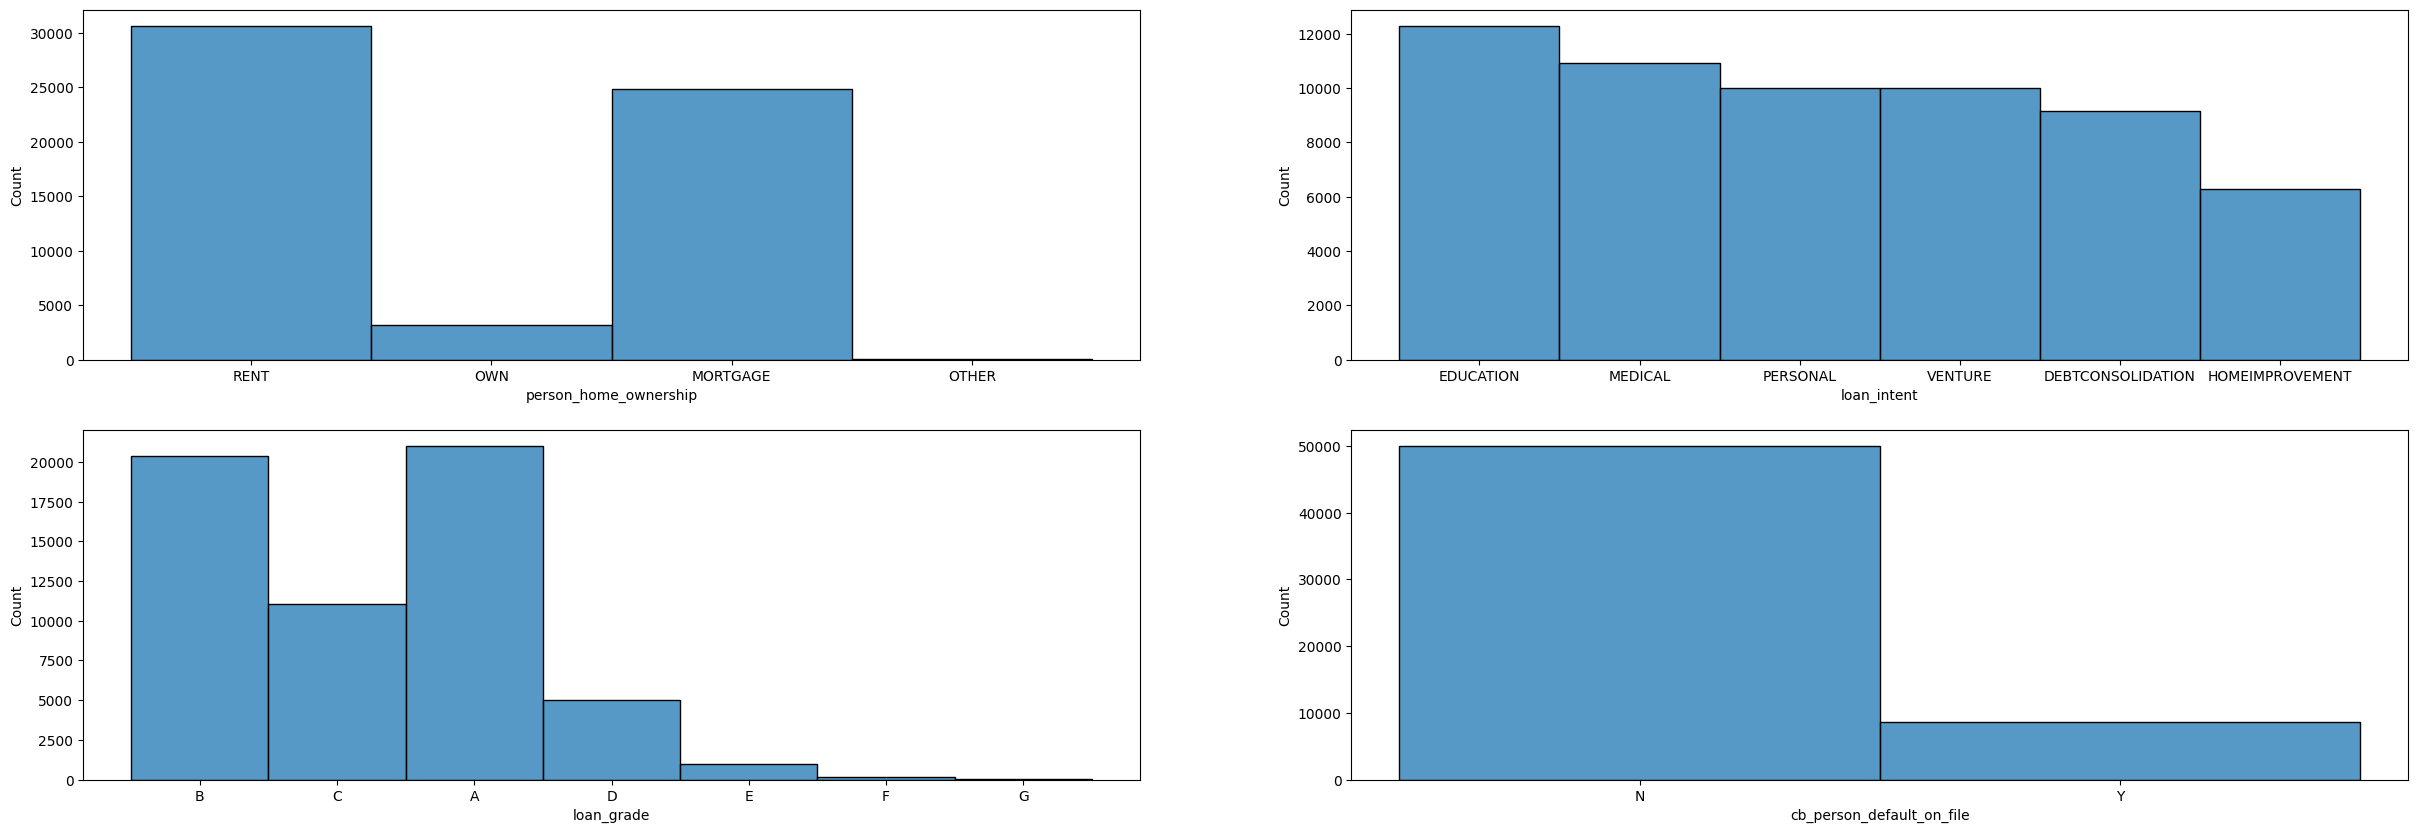

In [14]:
colsob = loan_cat.columns
fig, ax = plt.subplots(2,2, figsize=(30, 10))
for i, v in enumerate(colsob):
    row = i //2
    col = i % 2
    sns.histplot(x=v, data = loan_cat, ax=ax[row,col])
plt.show()

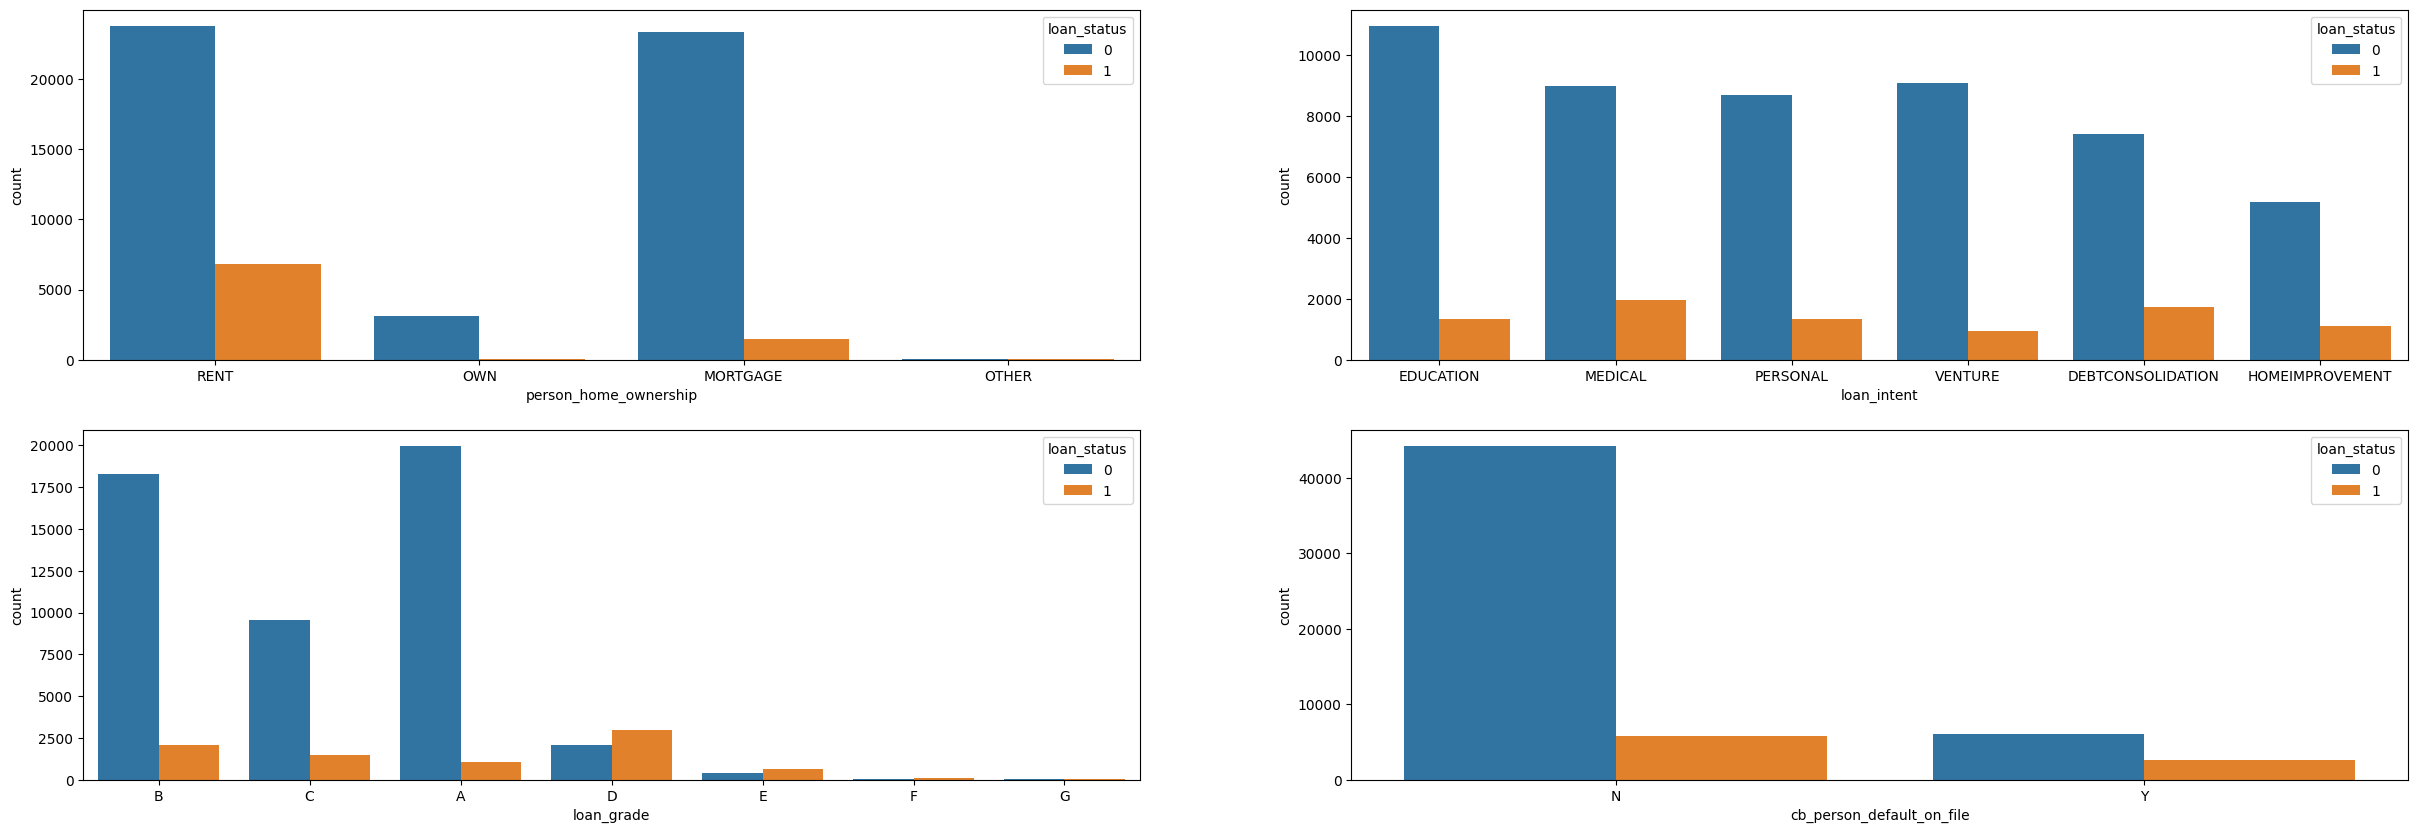

In [15]:
colsob = loan_cat.columns
fig, ax = plt.subplots(2,2, figsize=(30, 10))
for i, v in enumerate(colsob):
    row = i //2
    col = i % 2
    sns.countplot(x=v, data = loan, hue='loan_status',ax=ax[row,col])
plt.show()

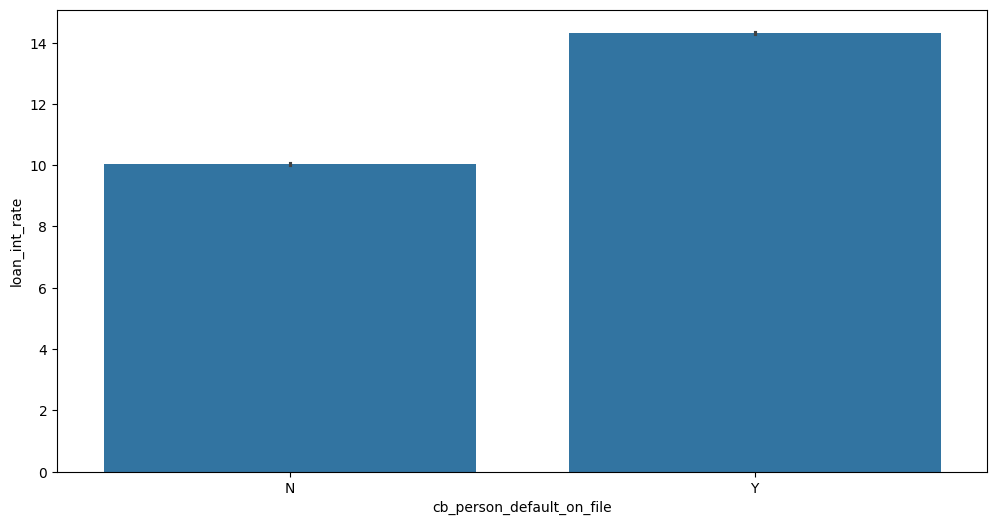

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cb_person_default_on_file', y='loan_int_rate', data =loan)
plt.show()

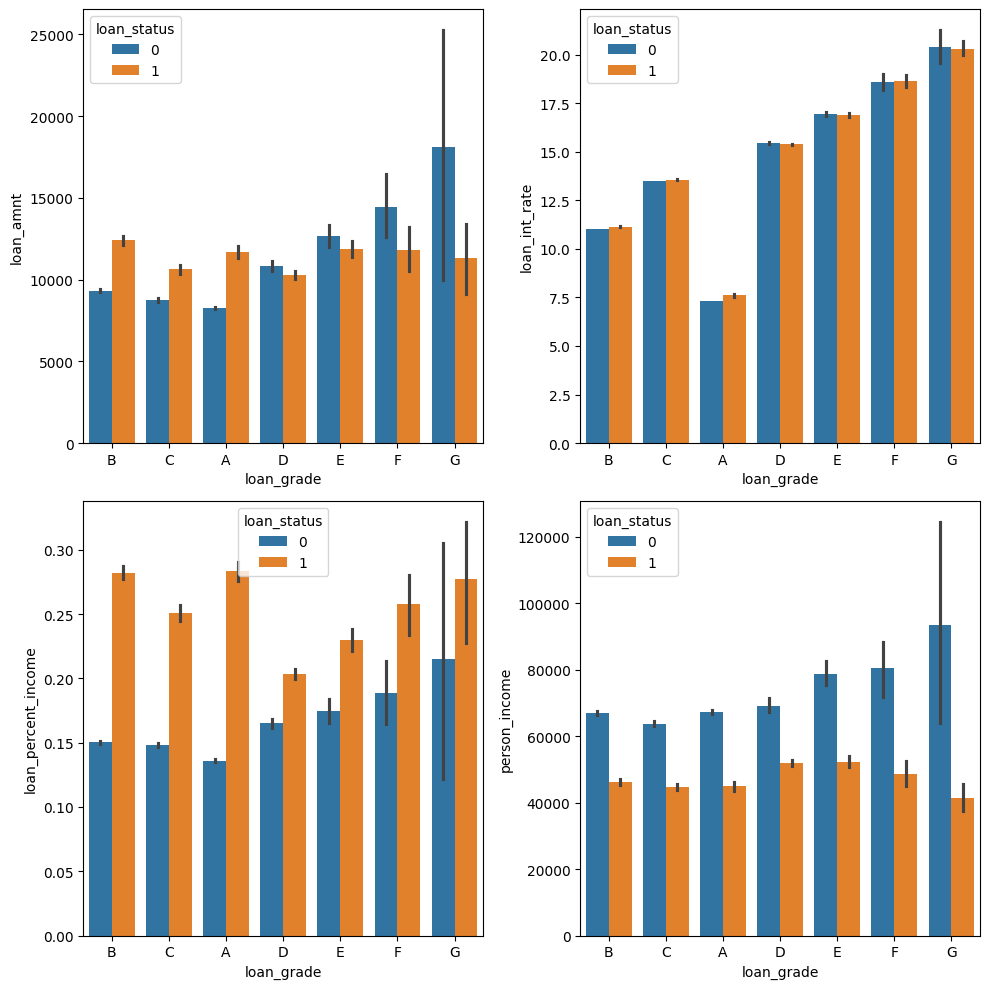

In [17]:
cols = ['loan_amnt', 'loan_int_rate', 'loan_percent_income','person_income']
f, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, v in enumerate(cols):
    row = i //2
    col = i % 2
    sns.barplot(x='loan_grade', y=v, data=loan, hue='loan_status', ax=ax[row, col])

plt.tight_layout()  # 그래프 간격 조정
plt.show()

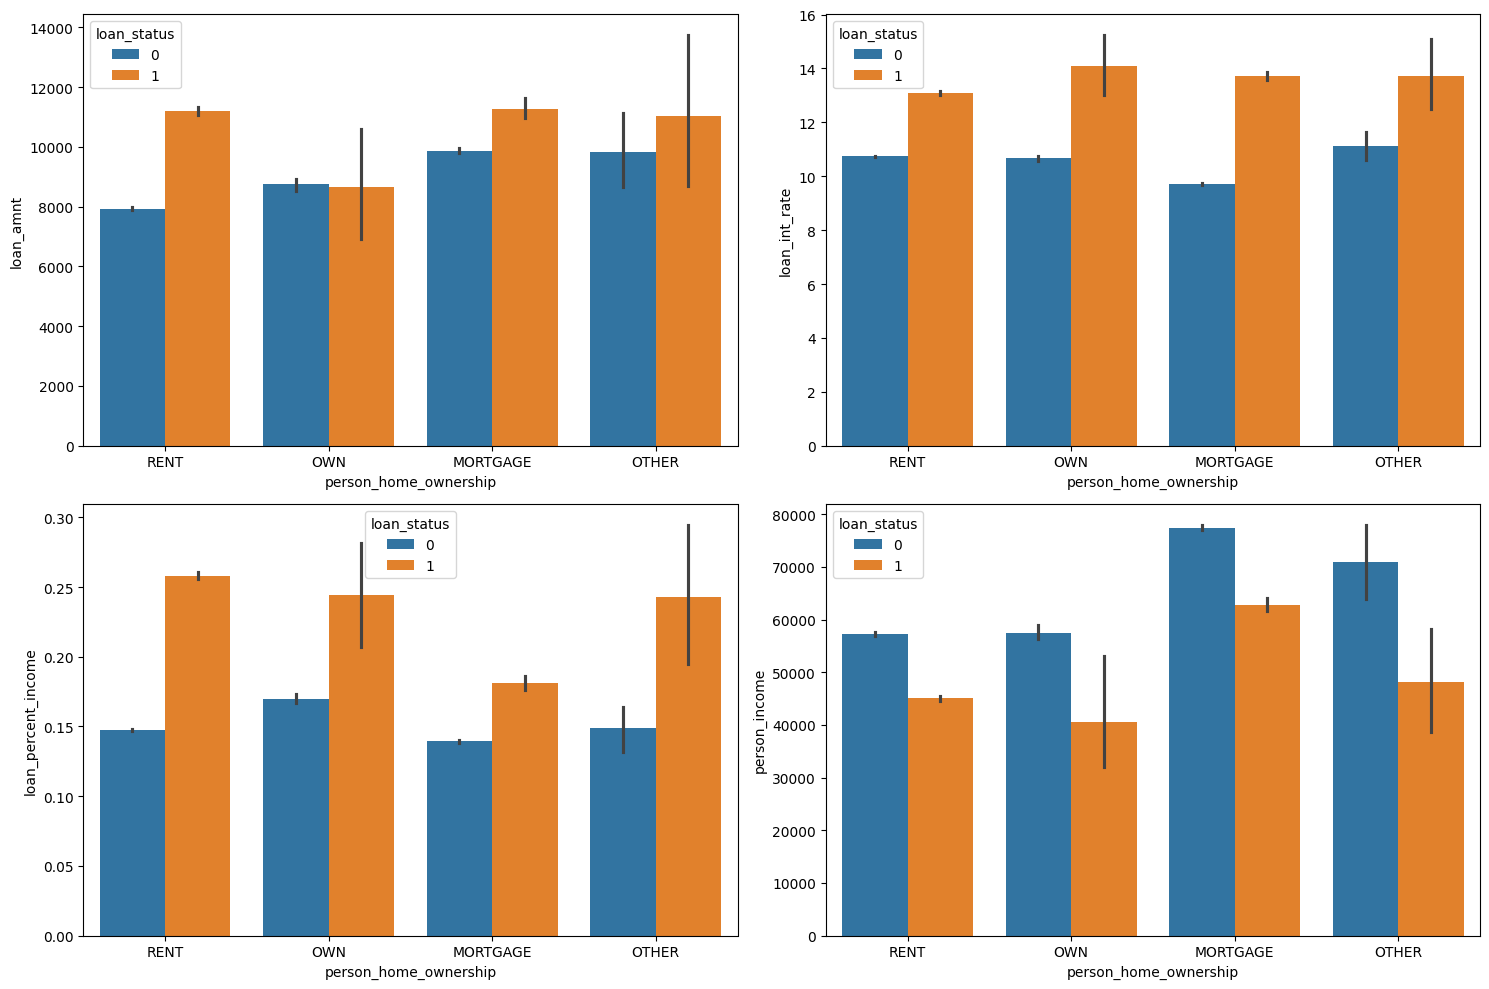

In [18]:
cols = ['loan_amnt', 'loan_int_rate', 'loan_percent_income','person_income']
f, ax = plt.subplots(2, 2, figsize=(15, 10))
for i, v in enumerate(cols):
    row = i //2
    col = i % 2
    sns.barplot(x='person_home_ownership', y=v, data=loan, hue='loan_status', ax=ax[row, col])

plt.tight_layout()  # 그래프 간격 조정
plt.show()

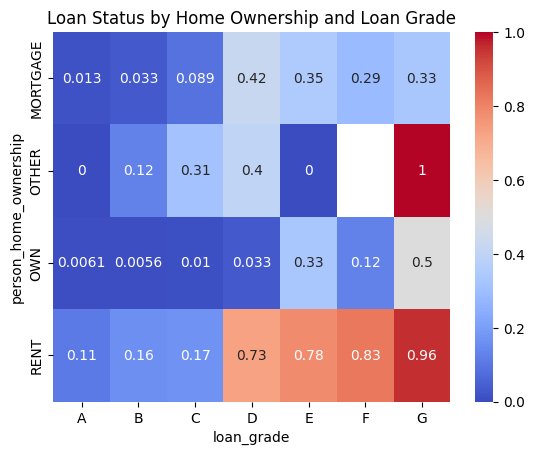

In [19]:
# 교차 테이블 생성 (각 조합별로 `loan_status`의 비율 계산)
heatmap_data = loan.pivot_table(
    index='person_home_ownership', 
    columns='loan_grade', 
    values='loan_status', 
    aggfunc='mean'
)

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0.5)
plt.title('Loan Status by Home Ownership and Loan Grade')
plt.show()


# 분석 내용

- 단순히 신용이 충분한 사람에 대해 대출 승인이 일어나는 것은 아니었다.

## 대출 등급
- 대출 등급이 낮은 사람들은 채무 불이행 기록이 많으며, 이로 인해 높은 대출 금리를 보인다.
- 대출 등급이 낮은 사람들의 대출 금액이 많으면 대출 승인이 일어나지 않는 경향이 있다.

## 대출 금리
- 대출 금리는 대출 승인에 영향을 미치지 않은 것으로 보인다.
- 채무 불이행 기록이 있다면 대출 금리가 높아진다.

## 소득 대비 대출금액
- 대출 등급과 관련 없이 소득 대비 대출금액이 높은 사람들에 대해 대출 승인이 일어나는 경향이 있다.
- 개인 소득과 대출 승인 여부는 음의 상관 관계를 보인다.

=> 대출 승인 여부에 중요한 요인은 높은 신용도 중요하지만, 대출 금액, 대출 금리, 개인 소득이 더 많은 영향을 미침을 알 수 있었다.
